# Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code -- huiying yu**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [1]:
import pandas as pd

Next we will import each of the three tables and assign names to each of the columns:

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python', encoding='latin1')


Let's take a look at the first 5 rows of each table:

In [3]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to
use as the merge (or join) keys based on overlapping names:

In [6]:
data = pd.merge(pd.merge(ratings, users), movies)

Below is the first row in that dataset

In [7]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [8]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [9]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):

In [10]:
ratings_by_title = data.groupby('title').size()

In [11]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [12]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [13]:
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [14]:
mean_ratings = mean_ratings.loc[active_titles]

In [15]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers, we can sort by the F column in descending order:

In [16]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [17]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Likewise, for males:

In [18]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [19]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [20]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [21]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [22]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [23]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Question 1, The mean of movie ratings by men of age above 25 for each particular genre

In [24]:
movie_data = data.copy()
# filter men above 25
movie_data = movie_data[(movie_data["gender"] == "M") & (movie_data["age"] > 25)]

# split genres into list
movie_data["genres"] = movie_data["genres"].str.split('|')
data_exploded = movie_data.explode("genres").reset_index(drop=True) 

# get mean ratings for each genre
genre_mean_ratings = data_exploded.groupby("genres")["rating"].mean().reset_index()
genre_mean_ratings


,genres,rating
0,Action,3.554547
1,Adventure,3.538637
2,Animation,3.721569
3,Children's,3.475314
4,Comedy,3.565456
5,Crime,3.764249
6,Documentary,3.950192
7,Drama,3.812309
8,Fantasy,3.490408
9,Film-Noir,4.117140


Question 2, The top 5 ranked movies by the most number of ratings (not the highest rating).

In [25]:
# top 5 movies with the most ratings
top_movie_ratings = data.groupby('title')['rating'].count().reset_index()
top_movie_ratings.sort_values('rating', ascending=False).head(5)

,title,rating
127,American Beauty (1999),3428
3153,Star Wars: Episode IV - A New Hope (1977),2991
3154,Star Wars: Episode V - The Empire Strikes Back...,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),2883
1789,Jurassic Park (1993),2672


Question 3, Average movie ratings between users of different age groups (<=18, 19-30,
31-50, 51-70, >=71)

In [26]:
# define age bins and age groups
age_bins = [0, 18, 30, 50, 70, float('inf')]
age_groups = ['<=18', '19-30', '31-50', '51-70', '>=71']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_groups, right=False)

# get average ratings for each age group
average_ratings = data.groupby('age_group', observed=False).agg({'rating': ['size', 'mean']})
average_ratings

rating          
             size      mean
age_group                  
<=18        27211  3.549520
19-30      579092  3.533299
31-50      282636  3.624050
51-70      111270  3.732677
>=71            0       NaN

Question 4, Pick a movie of your choice and for all movies of the same year
 provide a breakdown of the number of unique movies rated by 3 ranges of age of reviewers
 (a) under 18 (b) 19 to 45 (c) Above 45.

In [27]:
# pick a movie Jueassic Park in year 1993
pick_movie = "Jurassic Park (1993)"
movie_year = int(pick_movie[-5:-1]) 
same_year = data[data['title'].str.contains(str(movie_year))]

# conditions for age group
under_18 = same_year[same_year['age'] <= 17]['movie_id'].nunique()
nineteen_to_45 = same_year[(same_year['age'] >= 19) & (same_year['age'] <= 45)]['movie_id'].nunique()
above_45 = same_year[same_year['age'] >= 46]['movie_id'].nunique()

# list of unique movies rated by age group
age_group = pd.DataFrame({
    'age group': ['under 18', '19 to 45', 'above 45'],
    'unique movies rated': [under_18, nineteen_to_45, above_45]
})
age_group

,age group,unique movies rated
0,under 18,113
1,19 to 45,157
2,above 45,151


Question 5, A function that takes in a user_id and a movie_id, and returns a list of all the other movies that the user rated similarly to the given movie.

In [28]:

def get_similarly_rated_movies(user_id, movie_id):
    # get the rating of the movie by the user
    user_movie_rating = data[(data['user_id'] == user_id) & (data['movie_id'] == movie_id)]['rating'].iloc[0]
    
    # get all movies rated by the user with the same rating as the movie
    similarly_rated_movies = data[(data['user_id'] == user_id) & (data['rating'] == user_movie_rating)
                                & (data['movie_id'] != movie_id)][['movie_id', 'title', 'rating']].reset_index(drop=True)
    
    return similarly_rated_movies

# test user_id is 1, movie_id is 1193, title is One Flew Over the Cuckoo's Nest (1975), rating is 5
user_id = 1
movie_id = 1193
similarly_rated_movies = get_similarly_rated_movies(user_id, movie_id)
similarly_rated_movies

,movie_id,title,rating
0,2355,"Bug's Life, A (1998)",5
1,1287,Ben-Hur (1959),5
2,2804,"Christmas Story, A (1983)",5
3,595,Beauty and the Beast (1991),5
4,1035,"Sound of Music, The (1965)",5
5,3105,Awakenings (1990),5
6,1270,Back to the Future (1985),5
7,527,Schindler's List (1993),5
8,48,Pocahontas (1995),5
9,1836,"Last Days of Disco, The (1998)",5


Question 6, Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

A, Distribution of users' gender

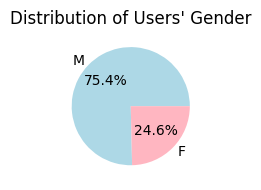

In [29]:
import matplotlib.pyplot as plt
gender_distribution = data['gender'].value_counts()

plt.figure(figsize=(4, 2))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Distribution of Users\' Gender')
plt.ylabel('')
plt.tight_layout()
plt.show()

Observations: the pie chart displays a stark gender contrast in the movie dataset, with 75.4% male users and 24.6% female users. This distinction emphasizes the need to cater to a diverse user base for optimal platform engagement.

B, Distribution of Top 5 Genres by Gender based on Total Ratings

Top 5 Genres for Males based on Total Ratings:
      genres gender  rating
15     Drama      M  965663
9     Comedy      M  912036
1     Action      M  739500
31  Thriller      M  533211
29    Sci-Fi      M  450726

Top 5 Genres for Females based on Total Ratings:
      genres gender  rating
14     Drama      F  369611
8     Comedy      F  343874
26   Romance      F  184770
0     Action      F  159330
30  Thriller      F  144035


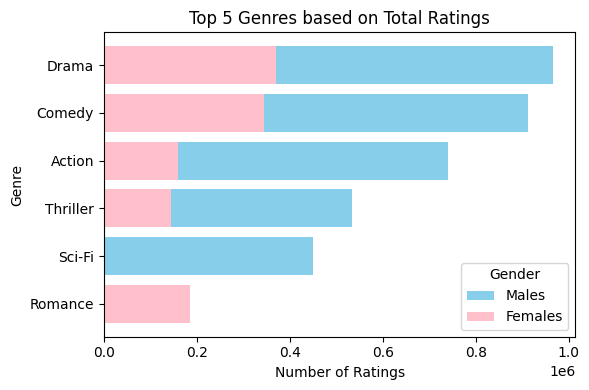

In [30]:
movie_data = data.assign(genres=data['genres'].str.split('|')).explode('genres')

# get total ratings for each genre split by gender
genre_ratings = movie_data.groupby(['genres', 'gender'])['rating'].sum().reset_index()
top_genres_male = genre_ratings[genre_ratings['gender'] == 'M'].nlargest(5, 'rating')
top_genres_female = genre_ratings[genre_ratings['gender'] == 'F'].nlargest(5, 'rating')

print("Top 5 Genres for Males based on Total Ratings:")
print(top_genres_male)
print("\nTop 5 Genres for Females based on Total Ratings:")
print(top_genres_female)

plt.figure(figsize=(6, 4))
plt.barh(top_genres_male['genres'], top_genres_male['rating'], color='skyblue', label='Males')
plt.barh(top_genres_female['genres'], top_genres_female['rating'], color='pink', label='Females')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.title('Top 5 Genres based on Total Ratings')
plt.legend(title='Gender', loc='lower right')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

Observations: drama is the top choice for both genders, especially favored by males, while comedy is enjoyed by both but slightly more by males. Action and thriller genres are more popular among males, whereas females show a preference for romance. Sci-fi appeals more to males. These genre preferences highlight diverse interests across genders in the movie-watching experience.

C, Average Ratings Over Time for 'Toy Story (1995)

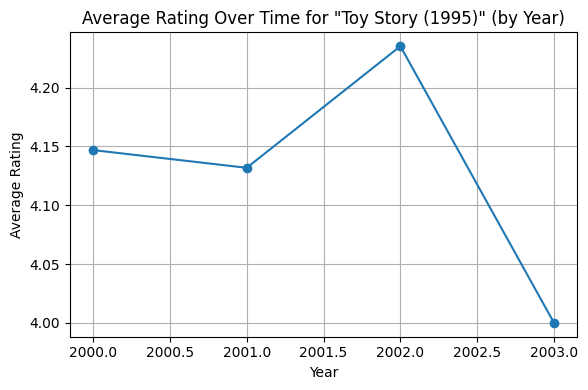

In [31]:
# pick a movie "Toy Story (1995)"
movie_title = "Toy Story (1995)"
movie_ratings = data[data['title'] == movie_title].copy()

# convert timestamp to datetime and extract year
movie_ratings['timestamp'] = pd.to_datetime(movie_ratings['timestamp'], unit='s')
movie_ratings['year'] = movie_ratings['timestamp'].dt.year

avg_rating_per_year = movie_ratings.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.plot(avg_rating_per_year['year'], avg_rating_per_year['rating'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title(f'Average Rating Over Time for "{movie_title}" (by Year)')
plt.grid(True)
plt.tight_layout()
plt.show()

Observations: from 2000 to 2003, the movie 'Toy Story (1995)' enjoyed consistently high average ratings, with a peak in 2002 at 4.24. Despite a slight dip in 2003, the film maintained a strong average rating of 4.0, reflecting its enduring popularity and positive viewer reception.

D, Top 25 movies by rating count.

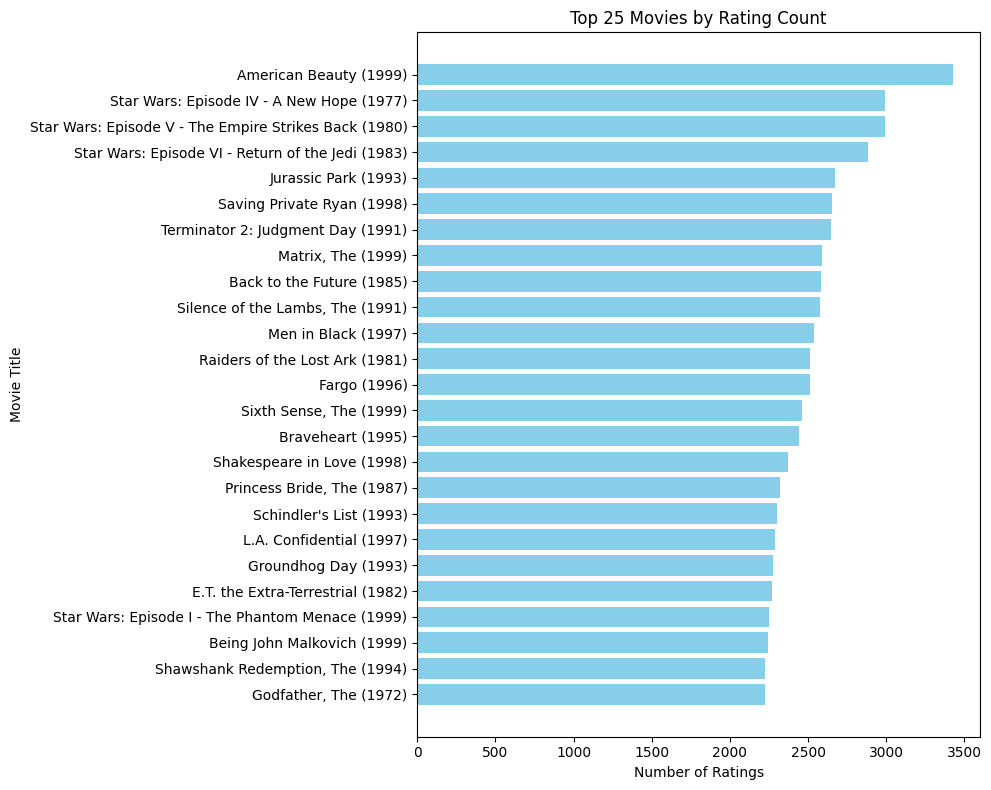

In [32]:
# get the total number of ratings for each movie
movie_ratings_count = data.groupby('title')['rating'].count().reset_index()
movie_ratings_count.columns = ['title', 'rating_count']

# get the top 25 movies by rating count
top_movies = movie_ratings_count.nlargest(25, 'rating_count')

plt.figure(figsize=(10, 8))
plt.barh(top_movies['title'], top_movies['rating_count'], color='skyblue')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 25 Movies by Rating Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Observations: the top-rated movies showcase the enduring appeal of "American Beauty" and the "Star Wars" franchise, highlighting their lasting impact on audiences. "Jurassic Park" also stands out as a beloved classic among the top-ranking films, reflecting the timeless popularity of iconic blockbusters.